# Assignment 2 - Likelihoods

**Q1: Let’s assume you expect this is a fair coin. What is the binomial probability of
observing 8 heads out of 10 coin flips, when θ = 0.5?**

- **A) 0.044**
- B) 0.05
- C) 0.5
- D) 0.8

In [70]:
import math

n = 10
k = 8

theta = 0.5

def binomial_probability(n, k, theta):
    return (math.factorial(n)/((math.factorial(k))*(math.factorial(n-k))))*(theta**k)*(1-theta)**(n-k)

binomial_probability(10, 8, 0.5)

0.0439453125

**Q2: The likelihood curve rises up and falls down, except at the extremes, when 0 heads
or only heads are observed. Open the PlotLikelihood.R script, and plot the likelihood
curves for 0 heads by changing the number of successes in line 3 to 0, and running the
script. What does the likelihood curve look like?**

- A) The likelihood curve is a horizontal line.
- B) The script returns and error message: it is not possible to plot the likelihood curve for 0 heads.
- **C) The curve starts at its highest point at θ = 0, and then the likelihood decreases as θ increases.**
- D) The curve starts at its lowest point at θ = 0, and then the likelihood increases as θ increases.

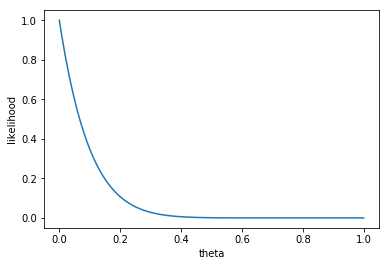

In [71]:
import numpy as np
import seaborn as sns
import pandas as pd

thetas = np.linspace(0, 1, 100)

likelihoods = []
for theta in thetas:
    likelihoods.append(binomial_probability(n, 0, theta))

data = pd.DataFrame(np.c_[thetas, np.array(likelihoods)], columns=['theta', 'likelihood'])
sns.lineplot(x="theta", y="likelihood",
             data=data);

**Q3: Get a coin out of your wallet. Flip it 13 times, and count the number of heads. Open
the R file CalculateLikelihoodRatio.R to calculate the likelihood of your observed results
under the hypothesis that your coin is fair, compared to the hypothesis that the coin is
not fair. In line 3, set the number of successes to the number of heads you observed. In
line 5, change the 0 in 0/13 to the number of heads you have observed (or leave it to 0 if
you didn’t observe any heads at all!). Run the script to calculate the likelihood ratio. What
is the likelihood ratio of a fair compared to a non-fair coin (or H0/H1) that flips heads as 8
often as you have observed, based on the observed data? Round your answer to 2 digits
after the decimal.**

In [72]:
# Calculate likelihood ratio

# trials
n = 13

# sucesses
x = 8

null_hypothesis = 0.5
alternative_hypothesis = 8/13

print("Likelihood ratio of H0 over H1: {}".format((binomial_probability(n, x, null_hypothesis) /
                                               binomial_probability(n, x, alternative_hypothesis))))

Likelihood ratio of H0 over H1: 0.7051860601460864


**Q4: What is the likelihood ratio for 5 out of 10 heads?**

In [75]:
null_hypothesis = 0.5
alternative_hypothesis = 0.4

n = 10

# sucesses
x = 5
print("Likelihood ratio of H0 over H1: {}".format((binomial_probability(n, x, null_hypothesis) /
                                               binomial_probability(n, x, alternative_hypothesis))))

Likelihood ratio of H0 over H1: 0.984177775938195


**Q5: What is the likelihood ratio for 50 out of 100 heads?**

In [23]:
n = 100
x = 50
print("Likelihood ratio of H0 over H1: {}".format((binomial_probability(n, x, null_hypothesis) /
                                               binomial_probability(n, x, alternative_hypothesis))))

Likelihood ratio of H0 over H1: 7.699071414075183


In [24]:
n = 1000
x = 500
print("Likelihood ratio of H0 over H1: {}".format((binomial_probability(n, x, null_hypothesis) /
                                               binomial_probability(n, x, alternative_hypothesis))))

Likelihood ratio of H0 over H1: 731784961.3558342


**Q7: When comparing two hypotheses ( θ = X vs θ = Y), a likelihood ratio of:**

- A) 0.02 means that there is not enough evidence in the data for either of the two hypotheses.
- B) 5493 means that hypothesis θ = X is most supported by the data.
- **C) 5493 means that hypothesis θ = X is much more supported by the data than θ = Y.**
- D) 0.02 means that the hypothesis that the data are 2% more likely under the hypothesis that θ = X than under the hypothesis that θ = Y

# Assignment 2 - Bayesian Thinking

**Q1: The true believer had a prior of Beta(1,0.5). After observing 10 heads out of 20 coin
flips, what is the posterior distribution, given that α* = α + x and β* = β + n – x?**

- A) Beta(10, 10)
- **B) Beta(11, 10.5)**
- C) Beta(10, 20)
- D) Beta(11, 20.5)

In [1]:
x = 10
n = 20

alpha = 1
beta = 0.5

alpha_asterico = alpha + x
beta_asterisco = beta+n-x

alpha_asterico, beta_asterisco

(11, 10.5)

**Q2: The strong skeptic had a prior of Beta(100,100). After observing 50 heads out of 100
coin flips, what is the posterior distribution, given that α* = α + x and β* = β + n – x? **

- A) Beta(50, 50)
- B) Beta(51, 51)
- **C) Beta(150, 150)**
- D) Beta(151, 151)

In [2]:
x = 50
n = 100

alpha = 100
beta = 100

alpha_asterico = alpha + x
beta_asterisco = beta+n-x

alpha_asterico, beta_asterisco

(150, 150)

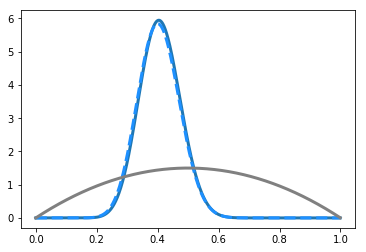

In [76]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

%matplotlib inline

H0 = 0.675
n = 20
x = 10

aprior = 1
bprior = 1

alikelihood = x + 1
blikelihood = n - x + 1

aposterior = aprior+alikelihood-1
bposterior = bprior+blikelihood-1

theta = np.arange(0, 1, 0.001)

prior = beta.pdf(theta, aprior, bprior)
likelihood = beta.pdf(theta, alikelihood, blikelihood)
posterior = beta.pdf(theta, aposterior, bposterior)

#plot(theta, posterior, ylim=c(0, 15), type = "l", lwd = 3, xlab = bquote(theta), ylab = "Density", las = 1)
plt.plot(theta, posterior, lw=3, label='Posterior');
plt.plot(theta, likelihood, lw=3, ls='--', color='dodgerblue', label='Likelihood');
plt.plot(theta, prior, lw=3, color='grey', label='Prior');

Text(0.55, 2.0, '1.5062863754075089')

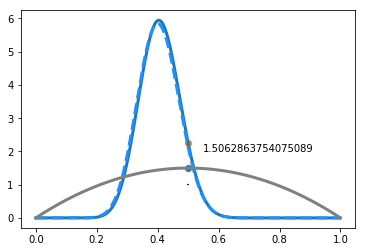

In [77]:
BF10 = beta.pdf(H0, aposterior, bposterior) / beta.pdf(H0, aprior, bprior)
plt.scatter(0.5, beta.pdf(H0, aprior, bprior))
plt.scatter(0.5, beta.pdf(H0, aposterior, bposterior))

plt.plot(theta, posterior, lw=3, label='Posterior');
plt.plot(theta, likelihood, lw=3, ls='--', color='dodgerblue', label='Likelihood');
plt.plot(theta, prior, lw=3, color='grey', label='Prior');

plt.arrow(0.5, 1.0, 0, BF10-beta.pdf(H0, aprior, bprior))
plt.annotate(BF10, (0.55, 2.0))

**Q3: Change the hypothesis in the first line from 0.5 to 0.675, and run the script. If you
were testing the idea that this coin returns 67.5% heads, which statement is true?**

- A) Your belief in this hypothesis, given the data, would have decreased.
- **B) Your belief in this hypothesis, given the data, would have stayed the same.**
- C) Your belief in this hypothesis, given the data, would have increased.

**Q4: Change the hypothesis in the first line back to 0.5. Let’s look at the increase in the
belief of the hypothesis θ = 0.5 for the strong skeptic after 10 heads out of 20 coin flips.
Change the α for the prior in line 4 to 100 and the β for the prior in line 5 to 100. Run the
script. Compare the Figure from R to the increase in belief for the newborn (in the plot on
the previous page). Which statement is true?**

- **A) The belief in the hypothesis that θ = 0.5, given the data, has increased for the strong skeptic, but not as much as it has for the newborn.**
- B) The belief in the hypothesis that θ = 0.5, given the data, has increased for the strong skeptic, exactly as much as it has for the newborn.
- C) The belief in the hypothesis that θ = 0.5, given the data, has increased for the strong skeptic, and much more than it has for the newborn.
- D) The belief in the hypothesis that θ = 0.5, given the data, has decreased for the strong skeptic.

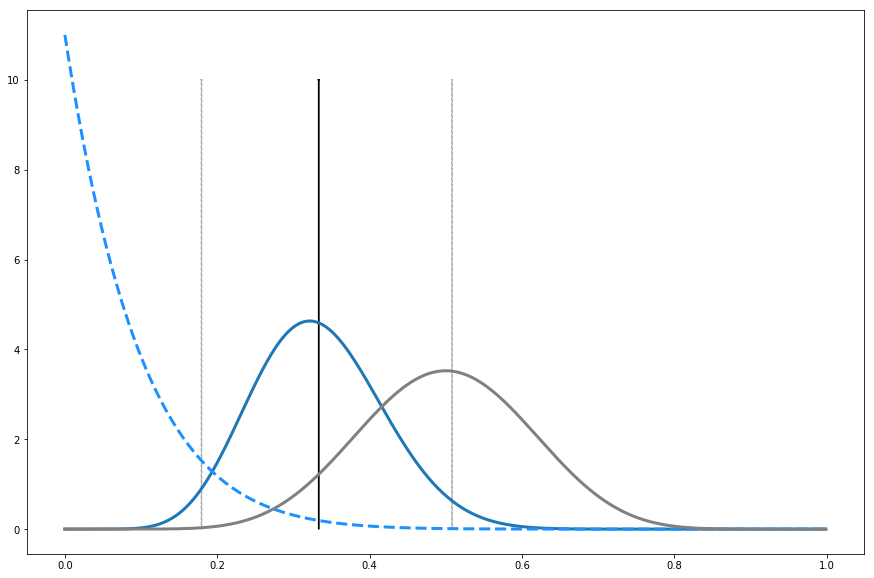

In [78]:
n = 10
x = 0

aprior = 10
bprior = 10

ymax = 10

alikelihood = x + 1
blikelihood = n - x + 1

aposterior = aprior+alikelihood-1
bposterior = bprior+blikelihood-1

theta = np.arange(0, 1, 0.001)

prior = beta.pdf(theta, aprior, bprior)
likelihood = beta.pdf(theta, alikelihood, blikelihood)
posterior = beta.pdf(theta, aposterior, bposterior)


fig, ax = plt.subplots(figsize=(15, 10))
#plot(theta, posterior, ylim=c(0, 15), type = "l", lwd = 3, xlab = bquote(theta), ylab = "Density", las = 1)
plt.plot(theta, posterior, lw=3, label='Posterior');
plt.plot(theta, likelihood, lw=3, ls='--', color='dodgerblue', label='Likelihood');
plt.plot(theta, prior, lw=3, color='grey', label='Prior');

LL = beta.ppf(0.025, aposterior, bposterior) 
UL = beta.ppf(0.975, aposterior, bposterior) 

plt.arrow(aposterior/(aposterior+bposterior), 0, 0, ymax)

plt.arrow(LL, 0, 0, ymax, color="grey", ls='--', alpha=0.5)
plt.arrow(UL, 0, 0, ymax, color="grey", ls='--', alpha=0.5)

**Q5: Assume the outcome of 20 coin flips had been 18 heads. Change x to 18 in line 2 and
run the script. Remember that the mean of the prior Beta(1,1) distribution is α/(α+β), or
1/(1+1) = 0.5. The Frequentist mean is simply x/n, or 18/20=0.9. Which statement is true?**

- **A) The frequentist mean is higher than the mean of the posterior, because the mean of the posterior is closer to the mean of the prior distribution. **
- B) The frequentist mean is lower than the mean of the posterior, because the mean of the posterior is closer to the mean of the prior distribution.
- C) The frequentist mean is higher than the mean of the posterior, because the mean of the posterior is further from to the mean of the prior distribution.
- D) The frequentist mean is lower than the mean of the posterior, because the mean of the posterior is further from to the mean of the prior distribution. 

**Q6: What is, today, your best estimate of the probability that the sun rises every day?
Assume you were born with an uniform Beta(1,1) prior. The sun can either rise, or it does
not. Assume you have seen the sun every day since you were born, which means there
has been a continuous string of successes for every day you have been alive. It is ok to
estimate the days you have been alive by just multiplying your age by 365 days. What is
your best estimate of the probability that the sun will rise? **

In [59]:
days_alive = 365*26
days_alive

n = days_alive+1
x = days_alive

aprior = 1
bprior = 1

ymax = 10

alikelihood = x + 1
blikelihood = n - x + 1

aposterior = aprior+alikelihood-1
bposterior = bprior+blikelihood-1

theta = np.arange(0, 1, 0.001)

prior = beta.pdf(theta, aprior, bprior)
likelihood = beta.pdf(theta, alikelihood, blikelihood)
posterior = beta.pdf(theta, aposterior, bposterior)
aposterior/(aposterior+bposterior)

0.9997893184451702

**Q7: What would have been the best estimate from a Frequentist perspective? **

In [60]:
1

1

**Q8: Reflect in 100 words on whether you believe observing only confirming evidence
should ever lead to an estimate of 100%, or whether there should always be some small
remaining doubt.**

Basically, we can not assume that all data collected so far is representative for our model. It might happen that we are not seeing enough evidence thus leading us into false conclusions. That is why a prior belief can correct our measurements.